## Problem Statement
Banking-Classification

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


Feraure Explanation

1. Age: The age of the customer.
2. Job: The type of job the customer has.
3. Marital: The marital status of the customer.
4. Education: The level of education of the customer.
5. Default: Whether the customer has defaulted on a loan in the past.
6. Housing: Whether the customer has a housing loan.
7. Loan: Whether the customer has a personal loan.
8. Contact: The method of communication used to contact the customer.
9. Month: The month in which the customer was last contacted.
10. Day_of_week: The day of the week on which the customer was last contacted.
11. Duration: The duration of the last contact with the custome,it was the important fearute because if duration=0 then y=no.
12. Campaign: The number of contacts made during this campaign for this customer.
13. Pdays: The number of days that passed by after the customer was last contacted from a previous campaign.
14. Previous: The number of contacts made before this campaign for this customer.
15. Poutcome: The outcome of the previous marketing campaign.

These features can be used to predict whether the customer will subscribe to a bank term deposit (the target variable 'y'). 


## Psecudo Code

1.  Loading the dataset using pandas.
2.  Checking the data using Head,Shape,Describe,nunique
3.  Checking the Null Values.
4.  Checking Correlation between Features by using Heatmap,if correlation is high between features, drop either one of the feature.
5.  Droping features 
6.  Split the dataset into features (x) and target variable (y)
7.  Checking the Updated Data.
8.  Seperating the Numerical & Categorical columns.
9.  Converting the Numerical & Categorical columns into Data Frames.
10. Converting the Categorical Data into Numerical Data by using LabelEncoder.
11. Concating the converted Categorical data and Numerical data into single  train_data.
12. Scaling the features using MinMaxScaler() from scikit-learn.
13. Split the data into training and testing sets using train_test_split() from scikit-learn.
14. Initialize the KNN classifier with the desired hyperparameters using KNeighborsClassifier() from scikit-learn.
15. Defning the parameter Grid Search
16. Creating the Grid Search CV and fit to train data.
17. Evaluate the best hyper parameter & accuracy of the model using accuracy_score() from scikit-learn on both train and test data.
18. Print the accuracy score.


In [152]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [153]:
# Load dataset
train_data=pd.read_csv('/content/new_train.csv')
test_data=pd.read_csv('/content/new_test (1).csv')


In [154]:
#train_data1=train_data

In [155]:
# To check train data 
train_data.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [156]:
train_data.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [157]:
# to check train data shape
# shape includes no of records & features 
train_data.shape

(32950, 16)

In [158]:
#test_data=test_data.sample(n=1500)

In [159]:
#To check test data
test_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   32    4        0          6        0        0     0        0      3   
1   37   10        3          6        0        0     0        0      4   
2   55    5        0          5        1        2     0        0      3   
3   44    2        1          0        1        0     0        1      4   
4   28    0        2          3        0        0     0        0      5   

   day_of_week  duration  campaign  poutcome  
0            3       131         5         1  
1            3       100         1         1  
2            2       131         2         1  
3            3        48         2         1  
4            0       144         2         1

In [160]:
# to check test data shape
# shape includes no of records & features 
test_data.shape


(8238, 13)

In [161]:
# Total count,Range,percentiles,standard deviation of each feature 
train_data.describe()

age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000

In [162]:
test_data.describe()

age          job      marital    education      default  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean     39.613498     3.729425     1.170430     3.740592     0.201141   
std       9.021371     3.597274     0.610371     2.134617     0.400878   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     0.000000     1.000000     2.000000     0.000000   
50%      38.000000     2.000000     1.000000     3.000000     0.000000   
75%      47.000000     7.000000     2.000000     6.000000     0.000000   
max      55.000000    11.000000     3.000000     7.000000     1.000000   

           housing         loan      contact        month  day_of_week  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean      1.072833     0.320952     0.364409     4.220685     2.020879   
std       0.985527     0.717918     0.481293     2.321464     1.386752   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     3.000000     1.000000   
50%       2.000000     0.000000     0.000000     4.000000     2.000000   
75%       2.000000     0.000000     1.000000     6.000000     3.000000   
max       2.000000     2.000000     1.000000     9.000000     4.000000   

          duration     campaign     poutcome  
count  8238.000000  8238.000000  8238.000000  
mean    227.820588     2.207575     0.932629  
std     160.447506     1.380902     0.357648  
min      36.000000     1.000000     0.000000  
25%     101.000000     1.000000     1.000000  
50%     178.000000     2.000000     1.000000  
75%     319.000000     3.000000     1.000000  
max     554.000000     5.000000     2.000000

In [163]:
#no of unique values in each feature 
train_data.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

In [164]:
test_data.nunique()

age             30
job             12
marital          4
education        8
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       517
campaign         5
poutcome         3
dtype: int64

In [165]:
#info regarding class , index , non null values count , Data Types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [166]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [167]:
#Total null values count in data 
train_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [168]:
test_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64

In [169]:
#correlation between features 
#If correlation is high we drop either one of the features
train_data.corr()

age  duration  campaign     pdays  previous
age       1.000000 -0.001841  0.003302 -0.032011  0.020670
duration -0.001841  1.000000 -0.075663 -0.047127  0.022538
campaign  0.003302 -0.075663  1.000000  0.053795 -0.079051
pdays    -0.032011 -0.047127  0.053795  1.000000 -0.589601
previous  0.020670  0.022538 -0.079051 -0.589601  1.000000

<AxesSubplot:>

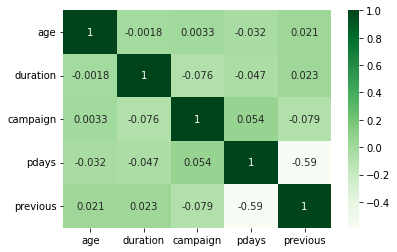

In [170]:
# features correlation with  visualization 
# features correlation indicated in colours & more correlated with white
sns.heatmap(train_data.corr(),annot=True,cmap='Greens')

In [171]:
test_data.corr()

age       job   marital  education   default   housing  \
age          1.000000  0.002677 -0.397970  -0.119857  0.173502  0.002880   
job          0.002677  1.000000  0.016581   0.141292 -0.026743  0.000902   
marital     -0.397970  0.016581  1.000000   0.106989 -0.066685 -0.018620   
education   -0.119857  0.141292  0.106989   1.000000 -0.183890 -0.010812   
default      0.173502 -0.026743 -0.066685  -0.183890  1.000000 -0.002054   
housing      0.002880  0.000902 -0.018620  -0.010812 -0.002054  1.000000   
loan        -0.024576 -0.003742  0.001492   0.003951 -0.002876  0.041426   
contact      0.025620 -0.026557 -0.053571  -0.112409  0.129102 -0.078997   
month       -0.015358 -0.057963 -0.018236  -0.080587  0.000303 -0.015039   
day_of_week -0.016473 -0.007312  0.000385  -0.017241  0.018432 -0.001646   
duration    -0.000643  0.003009  0.014694  -0.012129 -0.013423 -0.008423   
campaign     0.013662 -0.002036 -0.033047   0.011515  0.017555 -0.006739   
poutcome     0.013113  0.011968 -0.003010   0.016702  0.010697  0.001179   

                 loan   contact     month  day_of_week  duration  campaign  \
age         -0.024576  0.025620 -0.015358    -0.016473 -0.000643  0.013662   
job         -0.003742 -0.026557 -0.057963    -0.007312  0.003009 -0.002036   
marital      0.001492 -0.053571 -0.018236     0.000385  0.014694 -0.033047   
education    0.003951 -0.112409 -0.080587    -0.017241 -0.012129  0.011515   
default     -0.002876  0.129102  0.000303     0.018432 -0.013423  0.017555   
housing      0.041426 -0.078997 -0.015039    -0.001646 -0.008423 -0.006739   
loan         1.000000 -0.005445 -0.006446     0.009121 -0.023685  0.012022   
contact     -0.005445  1.000000  0.281152    -0.019222 -0.034859  0.085097   
month       -0.006446  0.281152  1.000000     0.043897  0.015305 -0.064773   
day_of_week  0.009121 -0.019222  0.043897     1.000000  0.029727 -0.058814   
duration    -0.023685 -0.034859  0.015305     0.029727  1.000000 -0.057458   
campaign     0.012022  0.085097 -0.064773    -0.058814 -0.057458  1.000000   
poutcome     0.009517  0.107378 -0.062513     0.037106  0.048663  0.035939   

             poutcome  
age          0.013113  
job          0.011968  
marital     -0.003010  
education    0.016702  
default      0.010697  
housing      0.001179  
loan         0.009517  
contact      0.107378  
month       -0.062513  
day_of_week  0.037106  
duration     0.048663  
campaign     0.035939  
poutcome     1.000000

<AxesSubplot:>

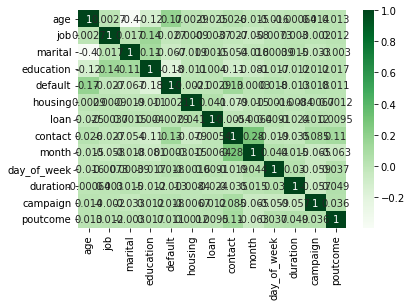

In [172]:
sns.heatmap(test_data.corr(),annot=True,cmap='Greens')

In [173]:
#Drop features may not required in model prediction 
xtr=train_data.drop(['pdays','previous','month','day_of_week'],axis=1)
xte=test_data.drop(['month','day_of_week'],axis=1)
xtr

age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes   

         contact  duration  campaign     poutcome    y  
0       cellular       227         4  nonexistent   no  
1      telephone       202         2      failure   no  
2       cellular      1148         1  nonexistent  yes  
3      telephone       120         2  nonexistent   no  
4       cellular       368         2  nonexistent   no  
...          ...       ...       ...          ...  ...  
32945   cellular       192         1  nonexistent   no  
32946   cellular        64         1      failure   no  
32947   cellular       131         4  nonexistent   no  
32948  telephone       165         1  nonexistent   no  
32949  telephone       544         3  nonexistent   no  

[32950 rows x 12 columns]

In [174]:
# splitting numerical & categorical columns
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [175]:
#numerical features 
num_cols

['age', 'duration', 'campaign']

In [176]:
#categorical features 
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [177]:
# converting numerical & categorical columns into data frames 
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

job   marital            education  default housing loan  \
0       blue-collar   married             basic.9y  unknown      no   no   
1      entrepreneur   married    university.degree       no      no   no   
2           retired   married             basic.4y       no      no   no   
3            admin.   married    university.degree       no     yes   no   
4           retired  divorced    university.degree       no      no   no   
...             ...       ...                  ...      ...     ...  ...   
32945      services    single          high.school       no     yes   no   
32946    technician   married  professional.course       no     yes   no   
32947        admin.   married             basic.9y       no      no  yes   
32948        admin.   married    university.degree       no      no   no   
32949        admin.   married    university.degree       no      no  yes   

         contact     poutcome    y  
0       cellular  nonexistent   no  
1      telephone      failure   no  
2       cellular  nonexistent  yes  
3      telephone  nonexistent   no  
4       cellular  nonexistent   no  
...          ...          ...  ...  
32945   cellular  nonexistent   no  
32946   cellular      failure   no  
32947   cellular  nonexistent   no  
32948  telephone  nonexistent   no  
32949  telephone  nonexistent   no  

[32950 rows x 9 columns]

In [178]:
xtr_cat=pd.DataFrame(xtr_cat)

In [179]:
xtr_cat1=xtr_cat.drop(['y'],axis=1)
target=xtr_cat.drop(xtr_cat1,axis=1)
target.head()

y
0   no
1   no
2  yes
3   no
4   no

In [180]:
cat_cols1=list(xtr_cat1.select_dtypes(include='object').columns)

In [181]:
# converting numerical & categorical columns into data frames 
xtr_cat1_tr=xtr[cat_cols]
xtr_cat1[cat_cols1]=xtr_cat1[cat_cols1].astype("category")
xtr_cat1

job   marital            education  default housing loan  \
0       blue-collar   married             basic.9y  unknown      no   no   
1      entrepreneur   married    university.degree       no      no   no   
2           retired   married             basic.4y       no      no   no   
3            admin.   married    university.degree       no     yes   no   
4           retired  divorced    university.degree       no      no   no   
...             ...       ...                  ...      ...     ...  ...   
32945      services    single          high.school       no     yes   no   
32946    technician   married  professional.course       no     yes   no   
32947        admin.   married             basic.9y       no      no  yes   
32948        admin.   married    university.degree       no      no   no   
32949        admin.   married    university.degree       no      no  yes   

         contact     poutcome  
0       cellular  nonexistent  
1      telephone      failure  
2       cellular  nonexistent  
3      telephone  nonexistent  
4       cellular  nonexistent  
...          ...          ...  
32945   cellular  nonexistent  
32946   cellular      failure  
32947   cellular  nonexistent  
32948  telephone  nonexistent  
32949  telephone  nonexistent  

[32950 rows x 8 columns]

In [182]:
xtr_num

age  duration  campaign
0       49       227         4
1       37       202         2
2       78      1148         1
3       36       120         2
4       59       368         2
...    ...       ...       ...
32945   28       192         1
32946   52        64         1
32947   54       131         4
32948   29       165         1
32949   35       544         3

[32950 rows x 3 columns]

In [183]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols1: 
    xtr_cat1[col]=encoder.fit_transform(xtr_cat1[col])

In [184]:
xtr_cat1.head()

job  marital  education  default  housing  loan  contact  poutcome
0    1        1          2        1        0     0        0         1
1    2        1          6        0        0     0        1         0
2    5        1          0        0        0     0        0         1
3    0        1          6        0        2     0        1         1
4    5        0          6        0        0     0        0         1

In [185]:
encoder_tg=LabelEncoder() 
target_enc=encoder_tg.fit_transform(target)

In [186]:
xtr_cat1.head()

job  marital  education  default  housing  loan  contact  poutcome
0    1        1          2        1        0     0        0         1
1    2        1          6        0        0     0        1         0
2    5        1          0        0        0     0        0         1
3    0        1          6        0        2     0        1         1
4    5        0          6        0        0     0        0         1

In [187]:
xtr_cat1=pd.concat([xtr_cat1,target],axis=1)

In [188]:
#concatination of transformed categorical data & numerical data
train_data1=pd.concat([xtr_cat1,xtr_num],axis=1)

In [189]:
columns=train_data1.columns
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'age', 'duration', 'campaign'],
      dtype='object')

In [190]:
columns=xte.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [191]:
#concating the target variable to data
x_ov=train_data1.drop(['y'],axis=1)
y_ov=train_data1.drop(x_ov,axis=1)

In [192]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#Separate majority and minority classes
x_df = train_data1[train_data1['y']==0]
y_df = train_data1[train_data1['y']==1]



In [193]:
print(x_df.shape,y_df.shape)

(0, 12) (0, 12)


In [194]:
smk=SMOTETomek(random_state=42)

In [195]:
x_ov1,y_ov1=smk.fit_resample(x_ov,y_ov)


In [196]:
print(x_ov1.shape,y_ov1.shape)

(57816, 11) (57816, 1)


In [197]:
y_ov1.value_counts()

y  
no     28908
yes    28908
dtype: int64

In [198]:
#normalizing the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data1=pd.DataFrame(scale.fit_transform(x_ov1),columns=columns)
test_data1=pd.DataFrame(scale.fit_transform(xte),columns=columns)
train_data1.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.090909  0.333333  0.285714        0.5      0.0      0.0   0.0      0.5   
1  0.181818  0.333333  0.857143        0.0      0.0      0.0   1.0      0.0   
2  0.454545  0.333333  0.000000        0.0      0.0      0.0   0.0      0.5   
3  0.000000  0.333333  0.857143        0.0      1.0      0.0   1.0      0.5   
4  0.454545  0.000000  0.857143        0.0      0.0      0.0   0.0      0.5   

   duration  campaign  poutcome  
0  0.395062  0.046157  0.054545  
1  0.246914  0.041074  0.018182  
2  0.753086  0.233428  0.000000  
3  0.234568  0.024400  0.018182  
4  0.518519  0.074827  0.018182

In [199]:
test_data1.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.206897  0.363636  0.000000   0.857143      0.0      0.0   0.0      0.0   
1  0.379310  0.909091  1.000000   0.857143      0.0      0.0   0.0      0.0   
2  1.000000  0.454545  0.000000   0.714286      1.0      1.0   0.0      0.0   
3  0.620690  0.181818  0.333333   0.000000      1.0      0.0   0.0      1.0   
4  0.068966  0.000000  0.666667   0.428571      0.0      0.0   0.0      0.0   

   duration  campaign  poutcome  
0  0.183398      1.00       0.5  
1  0.123552      0.00       0.5  
2  0.183398      0.25       0.5  
3  0.023166      0.25       0.5  
4  0.208494      0.25       0.5

In [200]:
#split data with test size of 30%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data1,y_ov1,test_size=0.3,random_state=12345)
print(x_train.shape)
print(y_train.shape)
y_test.shape

(40471, 11)
(40471, 1)


(17345, 1)

In [201]:
print(x_test.shape)

(17345, 11)


In [202]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_pred = []
        for test_point in x_test:
            distances = []
            for train_point in self.x_train:
                dist = np.linalg.norm(test_point - train_point)
                distances.append(dist)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common_label)
        return y_pred


In [203]:
# initialize KNN classifier
k = 5
knn = KNN(k)

In [204]:
knn.fit(x_train, y_train)

In [205]:
print(x_train.dtypes)


age          float64
job          float64
marital      float64
education    float64
default      float64
housing      float64
loan         float64
contact      float64
duration     float64
campaign     float64
poutcome     float64
dtype: object


In [206]:
print(x_test.dtypes)


age          float64
job          float64
marital      float64
education    float64
default      float64
housing      float64
loan         float64
contact      float64
duration     float64
campaign     float64
poutcome     float64
dtype: object


In [207]:
for col in x_test.columns:
    print(col, x_test[col].dtype)


age float64
job float64
marital float64
education float64
default float64
housing float64
loan float64
contact float64
duration float64
campaign float64
poutcome float64


In [208]:
for col in x_train.columns:
    print(col, x_train[col].dtype)

age float64
job float64
marital float64
education float64
default float64
housing float64
loan float64
contact float64
duration float64
campaign float64
poutcome float64


In [209]:
import numpy as np

# convert train data to int64
x_train = x_train.astype(np.int64)

# convert test data to int64
x_test = x_test.astype(np.int64)

In [210]:
import pandas as pd

# assuming your DataFrame is called df
print(x_train.index)
print(x_train.columns)


Int64Index([28076, 42336, 12466, 46381,   635, 38789, 20407,  8505, 50565,
            37107,
            ...
            40477, 16930, 28005, 20862,  4094, 44457, 19876,  2177, 11749,
            20962],
           dtype='int64', length=40471)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome'],
      dtype='object')


In [211]:
import numpy as np

# assuming x_train is the variable you want to check
if isinstance(x_train.iloc[0], str):
    print("x_train contains strings!")
else:
    print("x_train does not contain strings.")
    
if np.issubdtype(x_train.dtypes, np.number):
    print("x_train contains only numerical values!")
else:
    print("x_train contains non-numerical values.")


x_train does not contain strings.
x_train contains non-numerical values.


In [212]:
x_train.iloc[0]



age          0
job          0
marital      0
education    0
default      1
housing      0
loan         1
contact      0
duration     0
campaign     0
poutcome     0
Name: 28076, dtype: int64

In [213]:
x_train.loc[0]

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
duration     0
campaign     0
poutcome     0
Name: 0, dtype: int64

In [214]:
x_train.index

Int64Index([28076, 42336, 12466, 46381,   635, 38789, 20407,  8505, 50565,
            37107,
            ...
            40477, 16930, 28005, 20862,  4094, 44457, 19876,  2177, 11749,
            20962],
           dtype='int64', length=40471)

In [215]:
x_train= x_train.reset_index(drop=True)


In [216]:
print(y_train.dtypes)

y    object
dtype: object


In [217]:
print(y_test.dtypes)

y    object
dtype: object


In [218]:
# convert data type of X_test to match X_train
x_test = x_test.astype(np.int64)

In [230]:

# predict class labels of test data
y_pred = knn.predict(x_test)

# compute accuracy of predictions
accuracy = np.mean(y_pred == y_test)

# print accuracy
print("Accuracy:", accuracy)


NotFittedError: ignored

In [221]:
x_test.head()

age  job  marital  education  default  housing  loan  contact  \
42844    0    0        0          0        0        0     0        0   
10712    0    0        0          0        0        1     0        0   
36021    0    0        0          0        0        0     0        0   
18072    0    0        0          0        0        0     0        0   
27601    0    0        0          0        1        0     1        0   

       duration  campaign  poutcome  
42844         0         0         0  
10712         0         0         0  
36021         0         0         0  
18072         0         0         0  
27601         0         0         0

In [222]:
x_train.head()

age  job  marital  education  default  housing  loan  contact  duration  \
0    0    0        0          0        1        0     1        0         0   
1    0    0        0          0        0        0     0        1         0   
2    0    0        0          0        0        0     0        0         0   
3    0    0        0          0        1        0     0        0         0   
4    0    0        0          0        1        0     0        0         0   

   campaign  poutcome  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [223]:
# predict class labels of test data
y_pred = knn.predict(x_test)

# compute accuracy of predictions
accuracy = np.mean(y_pred == y_test)

# print accuracy
print("Accuracy:", accuracy)


TypeError: ignored

Model Building

In [227]:
#import libraries for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [226]:
# define the parameter grid
param_grid = {'n_neighbors': [7,9]}

In [228]:
knn = KNeighborsClassifier()

In [231]:
#creating grid search cv and and fit to train data 
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9]})

In [232]:
y_pred = grid_search.predict(x_train)

In [233]:
#best hyper parameter and accuaracy predicted 
print(grid_search.best_params_)
accuracy = accuracy_score(y_train, y_pred)
print('Train accuracy: ',accuracy)

{'n_neighbors': 9}
Train accuracy:  0.7046774233401695


In [234]:
best_knn = grid_search.best_estimator_
y_pred1 = best_knn.predict(x_test)

In [235]:
#accuracy predicted on test data
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred1)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.7052176419717497


In [236]:
y_pred12 = best_knn.predict(test_data1)

In [237]:
y_pred12

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [238]:
t_pred=pd.DataFrame(y_pred12,columns=['y'])

In [239]:
test_data12=pd.concat([test_data1,t_pred],axis=1)
test_data12.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.206897  0.363636  0.000000   0.857143      0.0      0.0   0.0      0.0   
1  0.379310  0.909091  1.000000   0.857143      0.0      0.0   0.0      0.0   
2  1.000000  0.454545  0.000000   0.714286      1.0      1.0   0.0      0.0   
3  0.620690  0.181818  0.333333   0.000000      1.0      0.0   0.0      1.0   
4  0.068966  0.000000  0.666667   0.428571      0.0      0.0   0.0      0.0   

   duration  campaign  poutcome    y  
0  0.183398      1.00       0.5  yes  
1  0.123552      0.00       0.5   no  
2  0.183398      0.25       0.5   no  
3  0.023166      0.25       0.5  yes  
4  0.208494      0.25       0.5   no

In [240]:
test_data12.y.value_counts()

no     5559
yes    2679
Name: y, dtype: int64

This problem is important for banks because it allows them to identify potential customers who are more likely to subscribe to their services, and to target their marketing efforts more effectively.
It also allows them to better manage their resources and optimize their marketing strategies, ultimately leading to increased revenue and profitability.